In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from collections import namedtuple

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('covid_19_data.csv', parse_dates=['Last Update'])
df_recovered=pd.read_csv('time_series_covid_19_recovered.csv')
df_confirmed=pd.read_csv('time_series_covid_19_confirmed.csv')
df_deaths=pd.read_csv('time_series_covid_19_deaths.csv')
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [0]:
df.head()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


In [0]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['SNo', 'Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [0]:
df_india = df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [0]:
df.groupby('Date').sum()
df_india.groupby('Date').sum()

,Confirmed,Deaths,Recovered
Date,,,
01/30/2020,1.0,0.0,0.0
01/31/2020,1.0,0.0,0.0
02/01/2020,1.0,0.0,0.0
02/02/2020,2.0,0.0,0.0
02/03/2020,3.0,0.0,0.0
...,...,...,...
04/09/2020,6725.0,226.0,620.0
04/10/2020,7598.0,246.0,774.0
04/11/2020,8446.0,288.0,969.0


In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

confirmed_india = df_india.groupby('Date').sum()['Confirmed'].reset_index()
deaths_india = df_india.groupby('Date').sum()['Deaths'].reset_index()
recovered_india = df_india.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
fig = go.Figure()
fig.add_trace(go.Bar(x=confirmed['Date'], y=confirmed['Confirmed'], name='Confirmed', marker_color='blue'))
fig.add_trace(go.Bar(x=deaths['Date'], y=deaths['Deaths'], name='Deaths', marker_color='red'))
fig.add_trace(go.Bar(x=recovered['Date'], y=recovered['Recovered'], name='Recovered', marker_color='green'))
fig.update_layout(
    title="Worldwide Corona Virus Cases - Bar Graph",
    barmode='group', bargap=0.3, bargroupgap=0.2
)

fig.show()

In [0]:
fig_india = go.Figure()
fig_india.add_trace(go.Bar(x=confirmed_india['Date'], y=confirmed_india['Confirmed'], name='confirmed_india', marker_color='blue'))
fig_india.add_trace(go.Bar(x=deaths_india['Date'], y=deaths_india['Deaths'], name='deaths_india', marker_color='red'))
fig_india.add_trace(go.Bar(x=recovered_india['Date'], y=recovered_india['Recovered'], name='recovered_india', marker_color='green'))
fig_india.update_layout(
    title="India Corona Virus Cases - Bar Graph",
    barmode='group', bargap=0.3, bargroupgap=0.2
)

fig_india.show()

In [0]:
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed', line=dict(color='blue', width=3)))
fig2.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='red', width=3)))
fig2.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='green', width=3)))
fig2.update_layout(
    title="Worldwide Corona Virus Cases - Line Plot"
)
fig2.show()

In [0]:
fig2_india = go.Figure()
fig2_india.add_trace(go.Scatter(x=confirmed_india['Date'], y=confirmed_india['Confirmed'], mode='lines+markers', name='Confirmed', line=dict(color='blue', width=3)))
fig2_india.add_trace(go.Scatter(x=deaths_india['Date'], y=deaths_india['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='red', width=3)))
fig2_india.add_trace(go.Scatter(x=recovered_india['Date'], y=recovered_india['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='green', width=3)))
fig2_india.update_layout(
    title="India Corona Virus Cases - Line Plot"
)
fig2_india.show()

In [0]:
df_anim_india = pd.read_csv('time_india.csv')
df_anim_india['size_color'] = np.array(df_anim_india['Confirmed'])*1000

In [0]:
fig_anim_india = px.density_mapbox(df_anim_india, lat='latitude', lon='longitude', hover_name="State/UnionTerritory", hover_data=["State/UnionTerritory"],
                                   animation_frame="Date", zoom=3.3, height=700)
fig_anim_india.update_layout(title="India")
fig_anim_india.update_layout(mapbox_style="open-street-map", 
                             mapbox_center_lon=df_anim_india.longitude.mean(), 
                             mapbox_center_lat=df_anim_india.latitude.mean())
fig_anim_india.show()

In [0]:
df_confirmed = df_confirmed[["Province/State","Lat","Long","Country"]]
df_temp = df.copy()
df_temp['Country'].replace({'Mainland China': 'China'}, inplace=True)
df_latlong = pd.merge(df_temp, df_confirmed, on=["Country", "Province/State"])

In [0]:
fig_anim = px.density_mapbox(df_latlong, lat="Lat", lon="Long", hover_name="Province/State", hover_data=["Confirmed", "Deaths", "Recovered"],
                        animation_frame="Date", radius=15, zoom=1.5, height=700)
fig_anim.update_layout(title="Worldwide Corona Virus Cases Time Lapse")
fig_anim.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig_anim.show()

In [0]:
#DATA FOR FORCASTING

confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

confirmed_india = df_india.groupby('Date').sum()['Confirmed'].reset_index()
deaths_india = df_india.groupby('Date').sum()['Deaths'].reset_index()
recovered_india = df_india.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
# imports
#For Data Processing
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#For Neural Network
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import Callback

Using TensorFlow backend.


In [0]:
scaler = MinMaxScaler(feature_range=(0,1))

In [0]:
#function for getting data in desired format

def get_data(train_test_split, input_seq_len):
  global confirmed_india
  global scaler

  #Create a new dataframe with only the 'Close' column and convert into numpy
  data = confirmed_india.filter(['Confirmed'])
  dataset = data.values
  training_datalen = math.ceil(len(dataset)*train_test_split)

  #Scale the all of the data to be values between 0 and 1 
  scaled_data = scaler.fit_transform(dataset)

  train_data = scaled_data[:training_datalen,:]
  test_data = scaled_data[(training_datalen-input_seq_len):,:]

  #Split the data into x_train and y_train data sets
  x_train, y_train = list(), list()
  for i in range(input_seq_len, len(train_data)):
    x_train.append(train_data[i-input_seq_len:i,0])
    y_train.append(train_data[i,0])

  x_test, y_test = list(), list()
  for i in range(input_seq_len,len(test_data)):
      x_test.append(test_data[i-input_seq_len:i,0])
      y_test.append(train_data[i,0])

  x_train, y_train = np.array(x_train), np.array(y_train)
  x_test, y_test = np.array(x_test), np.array(y_test)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
  return data, x_train, y_train, x_test, y_test

In [0]:
#Defining Model

def build_model(x_train_shape):
  model = Sequential()
  model.add(LSTM(units=49, return_sequences=True, input_shape=(x_train_shape[1:])))
  model.add(LSTM(units=63, return_sequences=False))
  model.add(Dense(units=28))
  model.add(Dense(units=1))
  model.compile(optimizer='adam', loss='mean_squared_error')
  return model


In [0]:
#Defining Parameters
input_sequence_length = 7
train_test_split_ratio = 0.85

data, x_train, y_train, x_test, y_test = get_data(train_test_split_ratio, input_sequence_length)
x_t, y_t = x_train, y_train

training_datalen = math.ceil(len(data)*train_test_split_ratio)

model = build_model(x_train.shape)

In [0]:
#Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=200)

Epoch 1/200
57/57 [==============================] - 1s 22ms/step - loss: 0.0022
Epoch 2/200
57/57 [==============================] - 0s 6ms/step - loss: 5.2713e-04
Epoch 3/200
57/57 [==============================] - 0s 6ms/step - loss: 2.7589e-04
Epoch 4/200
57/57 [==============================] - 0s 7ms/step - loss: 2.5575e-04
Epoch 5/200
57/57 [==============================] - 0s 7ms/step - loss: 2.1813e-04
Epoch 6/200
57/57 [==============================] - 0s 7ms/step - loss: 6.9778e-05
Epoch 7/200
57/57 [==============================] - 0s 7ms/step - loss: 1.9841e-04
Epoch 8/200
57/57 [==============================] - 0s 6ms/step - loss: 1.2593e-04
Epoch 9/200
57/57 [==============================] - 0s 7ms/step - loss: 3.8468e-04
Epoch 10/200
57/57 [==============================] - 0s 7ms/step - loss: 1.5578e-04
Epoch 11/200
57/57 [==============================] - 0s 7ms/step - loss: 1.8141e-04
Epoch 12/200
57/57 [==============================] - 0s 7ms/step - loss: 2.0

In [0]:
#Make predictions 
predictions = model.predict(x_t) 
predictions = scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(((predictions- y_t)**2)))
print(f'Root Mean Square Error = ', rmse)

Root Mean Square Error =  483.4162361773317


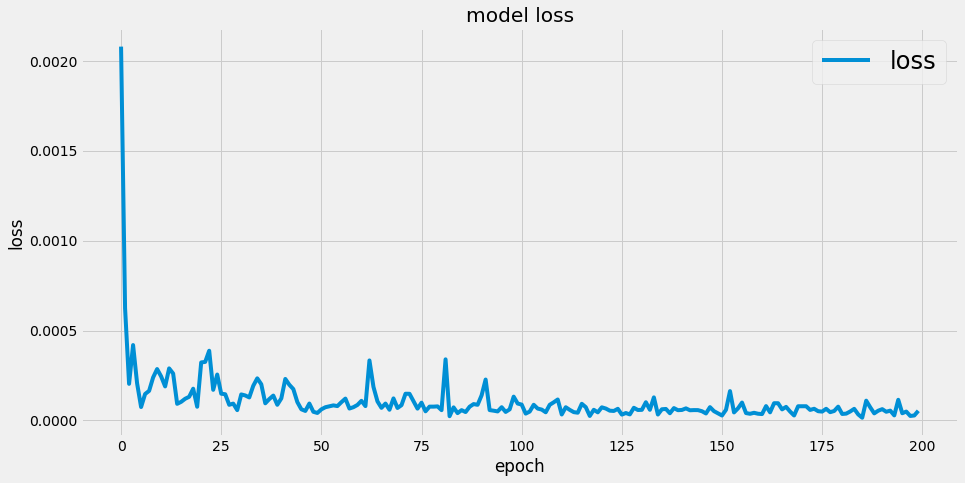

In [0]:
#Visualize Loss
plt.figure(figsize=(14,7))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], fontsize='xx-large', loc='upper right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



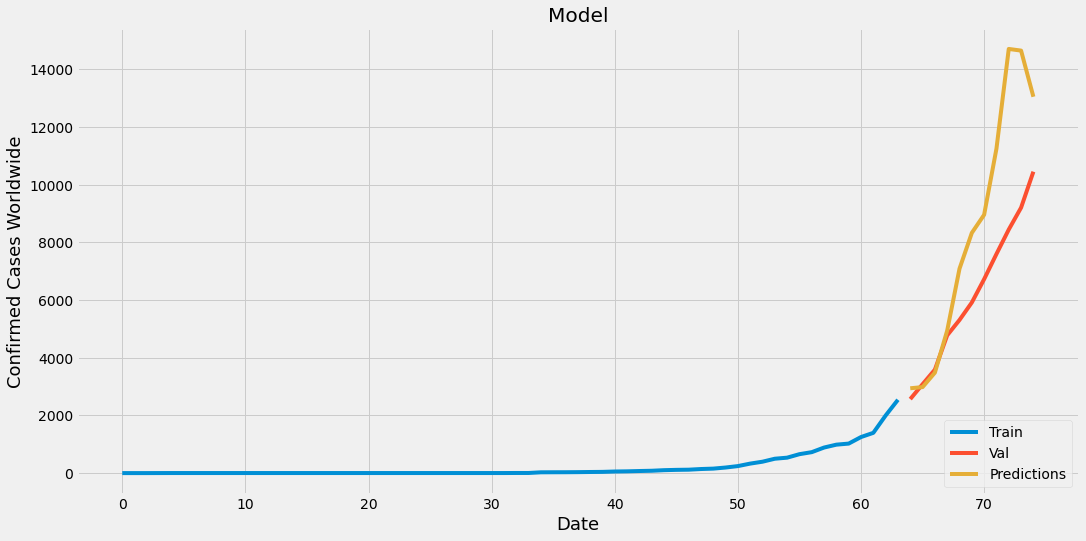

In [0]:
#Visualize Predictions
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
train = data[:training_datalen]
valid = data[training_datalen:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Confirmed Cases Worldwide', fontsize=18)
plt.plot(train['Confirmed'])
plt.plot(valid[['Confirmed', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 49)             9996      
_________________________________________________________________
lstm_2 (LSTM)                (None, 63)                28476     
_________________________________________________________________
dense_1 (Dense)              (None, 28)                1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 29        
Total params: 40,293
Trainable params: 40,293
Non-trainable params: 0
_________________________________________________________________
